# K-Means Clustering Using Basic Python & Numpy

In [226]:
import numpy as np
import matplotlib.pyplot as plt
# This function is used for upload txt file
def load_dataset(name):
    return np.loadtxt(name)

# This function is used for find the Euclidian Distance
def euclidian(a, b):
    return np.linalg.norm(a-b)

#This function is used for Kmean Clustering 
def kmeans(k, epsilon=0, distance='euclidian'):
    history_centroids = []
    if distance == 'euclidian':
        dist_method = euclidian
    dataset = load_dataset('C:\\Users\\hamza jamil\\Downloads\\ccc\\__MACOSX\\0.txt')
    # dataset = dataset[:, 0:dataset.shape[1] - 1]
    num_instances, num_features = dataset.shape
    prototypes = dataset[np.random.randint(0, num_instances - 1, size=k)]
    history_centroids.append(prototypes)
    prototypes_old = np.zeros(prototypes.shape)
    belongs_to = np.zeros((num_instances, 1))
    norm = dist_method(prototypes, prototypes_old)
    iteration = 0
    while norm > epsilon:
        iteration += 1
        norm = dist_method(prototypes, prototypes_old)
        prototypes_old = prototypes
        for index_instance, instance in enumerate(dataset):
            dist_vec = np.zeros((k, 1))
            for index_prototype, prototype in enumerate(prototypes):
                dist_vec[index_prototype] = dist_method(prototype,
                                                        instance)

            belongs_to[index_instance, 0] = np.argmin(dist_vec)

        tmp_prototypes = np.zeros((k, num_features))
        

        for index in range(len(prototypes)):
            instances_close = [i for i in range(len(belongs_to)) if belongs_to[i] == index]
            prototype = np.mean(dataset[instances_close], axis=0)
            # prototype = dataset[np.random.randint(0, num_instances, size=1)[0]]
            tmp_prototypes[index, :] = prototype

        prototypes = tmp_prototypes

        history_centroids.append(tmp_prototypes)
   

    

    return prototypes, history_centroids, belongs_to




#   load_dataset function for read txt file

In [227]:
print(load_dataset('C:\\Users\\hamza jamil\\Downloads\\ccc\\__MACOSX\\0.txt')) # here we call over load_dataset
                                                                      #functoin to read our txt file

[[  4.5799537    2.02328985   0.82315443 ...  -5.2333601    3.69233373
    1.94677647]
 [  4.1820568    2.32421058   0.92980167 ...  -5.56948353   3.36895663
    1.66670782]
 [  4.1477836    2.17320989   1.06224779 ...  -5.5818858    3.60442882
    1.93620213]
 ...
 [ -8.33967264 -13.2846668   -1.34615581 ...  -9.5650505    7.36895766
   -4.60840407]
 [ -8.59027707   7.20808236  -3.96995165 ...  -0.33034336   6.41448931
   -4.23826982]
 [ -2.89575506  13.53716692   4.87929015 ...  -3.97744592   9.37005611
    1.70085442]]


#    k-means function to find the cluster

In [309]:
kmeans(2)

(array([[ -6.36943736, -10.23562615,  -2.0862605 , ...,  -8.77419297,
           4.1839606 ,  -2.7274117 ],
        [ -2.20315915,   4.16804101,   3.6154046 , ...,  -0.77573151,
           0.13630712,   0.93228787]]),
 [array([[-7.63491641, -8.43914118, -2.16421733, ..., -7.94071366,
           7.81754891, -1.21814482],
         [ 4.36278063,  2.18590939,  1.01439833, ..., -5.38065308,
           3.30823618,  1.7545588 ]]),
  array([[-6.43479563, -9.7928934 , -1.51136949, ..., -7.10662562,
           4.85005863, -2.27216929],
         [-1.90941447,  4.8990271 ,  3.7347062 , ..., -0.97479454,
          -0.40549971,  0.97216554]]),
  array([[ -6.39448124, -10.09447462,  -1.8138094 , ...,  -7.79758269,
            4.70056374,  -2.38950866],
         [ -2.06475236,   4.55967395,   3.68782011, ...,  -0.90087786,
           -0.18593285,   0.9165836 ]]),
  array([[ -6.36943736, -10.23562615,  -2.0862605 , ...,  -8.77419297,
            4.1839606 ,  -2.7274117 ],
         [ -2.20315915,   4.16

# euclidian function to find the distance

In [232]:
print(euclidian(2.55555,1.223)) # here we call over function euclidian and distance betweeen two points

1.3325500000000001


# silhoutte Method

C:\Users\hamza jamil\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\hamza jamil\Anaconda3\lib\site-packages\numpy\core\_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


<IPython.core.display.Javascript object>


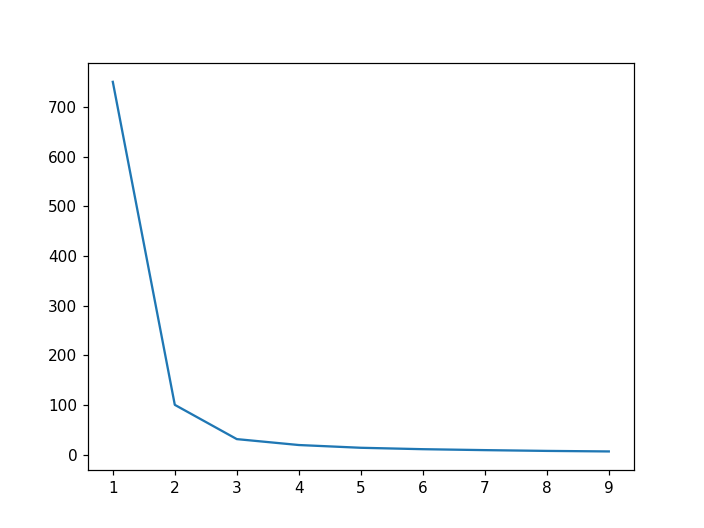

In [316]:

def silhoutte( clusters, parsedData=np.genfromtxt("C:\\Users\\hamza jamil\\Downloads\\ccc\\__MACOSX\\0.txt")):  # calculateSC function with parameters
        sc = 0
        s = 0
        y = []
        for i in range(len(clusters)): 
            for j in range(len(clusters[i])):
                x_val = parsedData.ix[clusters[i][j]][2]
                y_val = parsedData.ix[clusters[i][j]][3]
                dec.c
                d = 0
                for l in range(len(clusters[i])):
                    dist1 = ((parsedData.ix[clusters[i][j]][2] - parsedData.ix[clusters[i][l]][2]) ** 2)
                    dist2 = ((parsedData.ix[clusters[i][j]][3] - parsedData.ix[clusters[i][l]][3]) ** 2)
                    eud = (dist1 + dist2) ** .5
                    d += eud
                a = d / (len(clusters[i]) - 1)
                b_vals = []
                for m in range(len(clusters)):
                    if m == i:
                        continue
                    c = 0
                    for j in range(len(clusters[m])):
                        dist3 = ((x_val - parsedData.ix[clusters[m][j]][2]) ** 2)
                        dist4 = ((y_val - parsedData.ix[clusters[m][j]][3]) ** 2)
                        eu = (dist3 + dist4) ** .5
                        c += eu
                    avg = float(c / len(clusters[m]))
                    b_vals.append(avg)
                b = min(b_vals)
                s = float((b - a) / max(a, b))  
                sc += s 
        sc = sc / len(parsedData[0])
        return 
def cen(centriod):
    
    dataset = load_dataset('C:\\Users\\hamza jamil\\Downloads\\ccc\\__MACOSX\\0.txt')
    dj=[]
    centroids, history_centroids, belongs_to = kmeans(i) 
    dj.append(centroids)                           #here we find the centrod 


r=range(1,10)
for i in r:
    kc=kmeans(k=i)
plt.plot(r,dj)    
    
